##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [1]:
pip install mediapipe


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 1.5 MB/s eta 0:00:34
   ---------------------------------------- 0.2/50.8 MB 2.8 MB/s eta 0:00:19
   ---------------------------------------- 0.4/50.8 MB 2.5 MB/s eta 0:00:20
   ---------------------------------------- 0.5/50.8 MB 3.2 MB/s eta 0:00:16
    --------------------------------------- 0.7/50.8 MB 3.3 MB/s eta 0:00:16
    --------------------------------------- 0.8/50.8 MB 3.4 MB/s eta 0:00:15
    --------------------------------------- 0.8/50.8 MB 3.4 MB/s eta 0:00:15
    --------------------------------------- 0.8/50.8 MB 3.4 MB/s eta 0:00:15
    --------------------------------------- 0.9/50.8 MB 2.5 MB/s eta 0:00:20
   - -------------------------------------- 1.5/50.8 MB 3.4 MB/s eta 0:00:15
   - -------------------------------------- 1.8/50.8 MB 3.5 MB/s eta 0:00:15
   - -------------

Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [3]:
wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

SyntaxError: invalid syntax (3562866944.py, line 1)

In [3]:
import requests

url = "https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task"
r = requests.get(url)
with open('face_landmarker_v2_with_blendshapes.task', 'wb') as f:
    f.write(r.content)

## Visualization utilities

In [1]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [2]:
#!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

img = cv2.imread("D:/YZV-DERSLER/ComputerVision/Project/Code/business-person.png")
print(img.shape)

# show the image using opencv

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1358, 958, 3)


Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [16]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


In [69]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
#image = mp.Image.create_from_file("business-person.png")
image = mp.Image.create_from_file("D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/047/image_0007.pnm.ppm")
image2 = mp.Image.create_from_file("D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/087/image_0007.pnm.ppm")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)
detection_result2 = detector.detect(image2)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
#cv2.imshow("result", cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [70]:
cv2.imshow('image', annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

In [67]:
import mediapipe as mp

# Assuming 'results' is the object containing the facial landmarks
len(detection_result.face_landmarks[0])

478

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming points_3d is your array of 3D points

# Create the subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("Original 3D Points", "Modified 3D Points")
)

# Original 3D points
fig.add_trace(
    go.Scatter3d(
        x=[int(landmark.x * 95) for landmark in detection_result.face_landmarks[0]],
        y=[int(landmark.y * 1358) for landmark in detection_result.face_landmarks[0]],
        z=[landmark.z for landmark in detection_result.face_landmarks[0]],
        mode='markers',
        marker=dict(
            size=2,
            color=[landmark.z for landmark in detection_result.face_landmarks[0]],  # color points by Z coordinate
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    ),
    row=1, col=1
)

# Modified 3D points (example modification, you can adjust as needed)
fig.add_trace(
    go.Scatter3d(
        x=[int(landmark.x * 100) for landmark in detection_result2.face_landmarks[0]],  # different scaling for example
        y=[int(landmark.y * 1400) for landmark in detection_result2.face_landmarks[0]],  # different scaling for example
        z=[landmark.z * 1.5 for landmark in detection_result2.face_landmarks[0]],  # example modification
        mode='markers',
        marker=dict(
            size=2,
            color=[landmark.z * 1.5 for landmark in detection_result2.face_landmarks[0]],  # color points by modified Z coordinate
            colorscale='Viridis',  # choose a colorscale
            opacity=0.8
        )
    ),
    row=1, col=2
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=1600,  # Adjust width to accommodate two plots
    height=800,
    margin=dict(l=10, r=10, b=10, t=10)
)

# Show the plot
fig.show()


In [62]:
img = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

NameError: name 'cv2' is not defined

We will also visualize the face blendshapes categories using a bar graph.

In [63]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

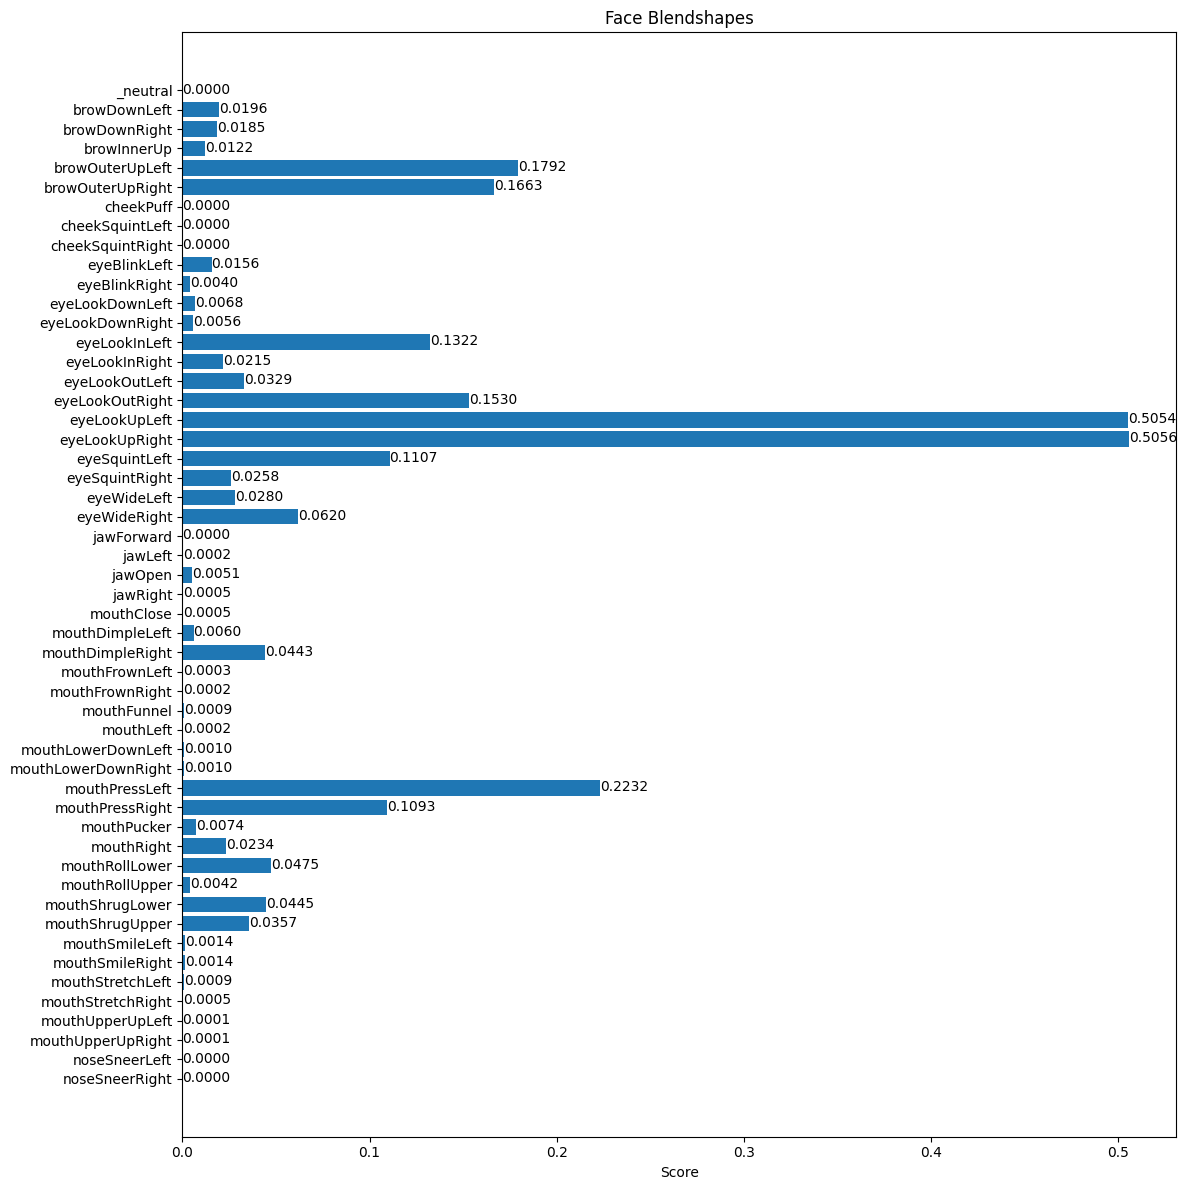

In [64]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [4]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.92205501e-01, -6.04903474e-02,  1.08946197e-01,
         1.18711746e+00],
       [ 9.10740122e-02,  9.48733926e-01, -3.02671373e-01,
         2.23701134e+01],
       [-8.50522369e-02,  3.10234487e-01,  9.46847558e-01,
        -6.80049210e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]


LOOK AT MIN MAX VALUES

In [41]:
paths = ["D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/007/image_0007.pnm.ppm","D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/017/image_0007.pnm.ppm","D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/027/image_0007.pnm.ppm","D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/037/image_0007.pnm.ppm","D:/YZV-DERSLER/ComputerVision/Project/Dataset/face_database_camera12/camera1/047/image_0007.pnm.ppm"]

results = []
for path in paths:
    image = mp.Image.create_from_file(path)
    results.append(detector.detect(image))
    

In [44]:
# get min and max values for x,y,z axis for all results
x_min = [min([landmark.x for landmark in result.face_landmarks[0]]) for result in results]
x_max = [max([landmark.x for landmark in result.face_landmarks[0]]) for result in results]
y_min = [min([landmark.y for landmark in result.face_landmarks[0]]) for result in results]
y_max = [max([landmark.y for landmark in result.face_landmarks[0]]) for result in results]
z_min = [min([landmark.z for landmark in result.face_landmarks[0]]) for result in results]
z_max = [max([landmark.z for landmark in result.face_landmarks[0]]) for result in results]    

In [45]:
x_min

[0.2365187108516693,
 0.4123227596282959,
 0.35980668663978577,
 0.3292742967605591,
 0.2441263198852539]

In [46]:
x_max

[0.4527752995491028,
 0.6481256484985352,
 0.5654322504997253,
 0.5680006146430969,
 0.46759551763534546]

In [47]:
y_min

[0.3352121412754059,
 0.32182157039642334,
 0.36928868293762207,
 0.17019475996494293,
 0.3826121687889099]

In [48]:
y_max

[0.6734097599983215,
 0.6568930149078369,
 0.6884363293647766,
 0.5444155335426331,
 0.7274299263954163]

In [49]:
z_min

[-0.05202769860625267,
 -0.051238764077425,
 -0.04964005574584007,
 -0.057753629982471466,
 -0.05508802458643913]